In [25]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets,transforms
from torch.utils.data import DataLoader,random_split
import sys
import torch.nn as nn
import torchvision
from torch.functional import F
import gc
from PIL import Image

In [2]:
os.chdir("../")

In [35]:
# ===========================
# 1️⃣ Define your transformations
# ===========================


transform = transforms.Compose([
    transforms.Resize((224, 224)),                     # Resize images
    transforms.RandomHorizontalFlip(p=0.5),            # Randomly flip images
    transforms.RandomRotation(degrees=15),             # Random rotation
    #transforms.ColorJitter(brightness=0.2),  # Add jitter
    transforms.ToTensor(),                             # Convert to tensor [C, H, W] in [0, 1]
    transforms.Normalize(mean=[0.5, 0.5, 0.5],          # Normalize with 0–1 range scaling
                         std=[0.5, 0.5, 0.5])
])



# ===========================
# 2️⃣ Load the full dataset
# ===========================
dataset = datasets.ImageFolder(root="raw_data/image_dataset/road_image_dataset", transform=transform)

# ===========================
# 3️⃣ Split dataset into train & test
# ===========================
train_size = int(0.8 * len(dataset))   # 80% for training
test_size = len(dataset) - train_size  # 20% for testing

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# ===========================
# 4️⃣ Create DataLoaders
# ===========================
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [36]:
image, label = dataset[0]

In [37]:
image.shape

torch.Size([3, 224, 224])

In [43]:
X,y = next(iter(test_loader))

In [44]:
X.shape

torch.Size([32, 3, 224, 224])

In [45]:
dataset.classes

['Negative', 'Positive']

tensor([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.81960785].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with R

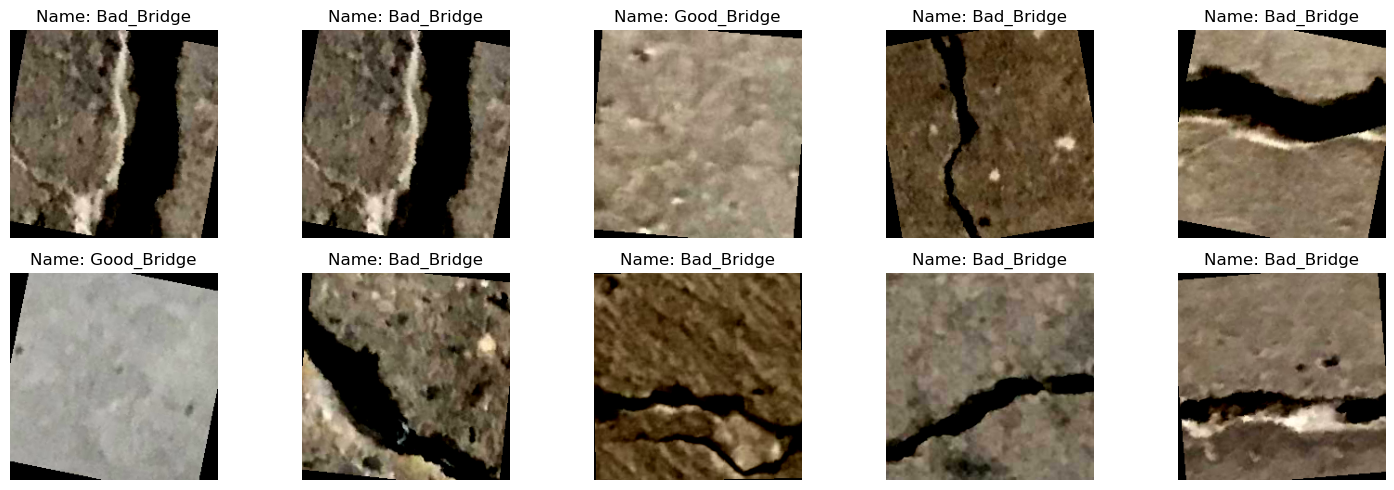

In [48]:
fig,axsex = plt.subplots(2,5,figsize=(15,5))

for ax in axsex.flatten():
    img_num = np.random.choice(range(0,len(X)))
    ax.imshow(X[img_num,].permute(1,2,0))
    label = "Good_Bridge" if y[img_num] == 0 else "Bad_Bridge"
    ax.set_title(f"Name: {label}")
    ax.axis("off")

plt.tight_layout() 